In [10]:
import pandas as pd
import copy

# importa dataset
mental_health_conversation_dataset = pd.read_csv('./datasets/Mental_Health_FAQ.csv')
mental_health_conversation_dataset.drop(columns=['Question_ID'], axis=0, inplace=True)
# importa dataset
QA_python_dataset = pd.read_csv('./datasets/Dataset_Python_Question_Answer.csv')
QA_python_dataset = QA_python_dataset.rename(columns={"Question": "Questions", "Answer": "Answers"})
#importa dataset
conversation_3d_chatbot = pd.read_csv('./datasets/3d-conversation-chatbot.csv')
conversation_3d_chatbot.drop(columns=['Unnamed: 0'], axis=0, inplace=True)
conversation_3d_chatbot = conversation_3d_chatbot.rename(columns={"question": "Questions", "answer": "Answers"})
#importa dataset
# file = open("./datasets/jungleb.txt", "r")
# the_jungle_book = file.read()
# file.close()
# junta datasets
df_concated = pd.concat([mental_health_conversation_dataset, QA_python_dataset, conversation_3d_chatbot], ignore_index=True)
# tira dados vazios
df_concated.dropna()
# reseta indexes
df_concated = df_concated.reset_index(drop=True)
# clona dataset para conservar tratamento
df_clone = copy.deepcopy(df_concated)
# junta colunas
data = {"text": []}
# data['text'].append(the_jungle_book)
for x in range(0, len(df_clone)):
    text = "".join(df_clone['Questions'][x]+" "+df_clone['Answers'][x])+"\n"
    data['text'].append(text)
df_merged = pd.DataFrame(data)
df_clone2 = df_merged.copy()
print('done!')

done!


In [11]:
text = df_clone2.text.values
joined_text = "".join(text)
print('done!')

done!


In [15]:
joined_text = joined_text[:10000]
# joined_text = joined_text.split('\n')

In [14]:
#REMOVE STOPWORDS
import numpy as np

import nltk
from nltk.corpus import stopwords

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\igorb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# Get stopwords for English by default
stop_words = stopwords.words('english')

# Lowercase the text (optional)
text = joined_text.lower()

# Tokenize the text (split into words)
words = text.split()

filtered_words = [word for word in words if word not in stop_words]

# Join the filtered words back into a string (optional)
filtered_text = " ".join(filtered_words)
filtered_text = filtered_text.replace("\\n", "")
filtered_text = filtered_text.replace("(", "")
filtered_text = filtered_text.replace(")", "")
# filtered_text = = filtered_text.replace("€™", "")
# filtered_text = = filtered_text.replace("€", "")
# filtered_text = = filtered_text.replace("™", "")

filtered_text

'mean mental illness? mental illnesses health conditions disrupt personâ€™s thoughts, emotions, relationships, daily functioning. associated distress diminished capacity engage ordinary activities daily life. mental illnesses fall along continuum severity: fairly mild interfere aspects life, certain phobias. end spectrum lie serious mental illnesses, result major functional impairment interference daily life. include disorders major depression, schizophrenia, bipolar disorder, may require person receives care hospital. important know mental illnesses medical conditions nothing personâ€™s character, intelligence, willpower. diabetes disorder pancreas, mental illness medical condition due brainâ€™s biology. similarly one would treat diabetes medication insulin, mental illness treatable combination medication social support. treatments highly effective, 70-90 percent individuals receiving treatment experiencing reduction symptoms improved quality life. proper treatment, possible person me

In [17]:
to_separate_for_train_texts = []

for text in joined_text.split('\n'):
    for mini_text in text.split('.'):
        for min_text in mini_text.split('?'):
            to_separate_for_train_texts.append(min_text)
to_separate_for_train_texts[1]

' Mental illnesses are health conditions that disrupt a personâ€™s thoughts, emotions, relationships, and daily functioning'

In [28]:
#nltk ja importado acima

'''
The way you tokenize your data can significantly impact the performance of your model.
'''

#tolkenizando por palavra
words_tolkenization = filtered_text.split()

#tolkenizando por frase/sentença
sentences_tolkenization = nltk.sent_tokenize(filtered_text)
sentences_tolkenization = filtered_text.split('.')
sentences_tolkenization

['mean mental illness? mental illnesses health conditions disrupt personâ€™s thoughts, emotions, relationships, daily functioning',
 ' associated distress diminished capacity engage ordinary activities daily life',
 ' mental illnesses fall along continuum severity: fairly mild interfere aspects life, certain phobias',
 ' end spectrum lie serious mental illnesses, result major functional impairment interference daily life',
 ' include disorders major depression, schizophrenia, bipolar disorder, may require person receives care hospital',
 ' important know mental illnesses medical conditions nothing personâ€™s character, intelligence, willpower',
 ' diabetes disorder pancreas, mental illness medical condition due brainâ€™s biology',
 ' similarly one would treat diabetes medication insulin, mental illness treatable combination medication social support',
 ' treatments highly effective, 70-90 percent individuals receiving treatment experiencing reduction symptoms improved quality life',
 '

In [49]:
from collections import defaultdict

def create_token_index(sentences):
    # Create a counter to track token frequencies
    token_counts = defaultdict(int)
    for sentence in sentences:
        # tive q usar com split pq sem tava pegando por letra
        for token in sentence.split():
            token_counts[token] += 1

    # Create a vocabulary (list of unique tokens) in sorted order (optional)
    vocab = sorted(token_counts.keys())

    # Create the token-to-index dictionary
    token_index = {token: i for i, token in enumerate(vocab)}

    return token_index

vocab_token_index = create_token_index(sentences_tolkenization)

vocab_token_index['1'] = 428
vocab_token_index[''] = 0

vocab_token_index

{'1': 428,
 '18,': 1,
 '24': 2,
 '5': 3,
 '70-90': 4,
 '75': 5,
 'abuse': 6,
 'access': 7,
 'activities': 8,
 'additional': 9,
 'additionally,': 10,
 'adolescence': 11,
 'adults': 12,
 'adults:': 13,
 'advice,': 14,
 'advise': 15,
 'affect': 16,
 'affect?': 17,
 'affected': 18,
 'affects': 19,
 'age': 20,
 'age,': 21,
 'ages': 22,
 'aggressive': 23,
 'alcohol': 24,
 'along': 25,
 'although': 26,
 'america,': 27,
 'and/or': 28,
 'anger': 29,
 'another': 30,
 'answered': 31,
 'anxiety': 32,
 'anyone,': 33,
 'appears': 34,
 'appetite': 35,
 'area': 36,
 'areas': 37,
 'aspects': 38,
 'associated': 39,
 'assume': 40,
 'attention': 41,
 'authority,': 42,
 'available': 43,
 'available?': 44,
 'aware': 45,
 'background': 46,
 'based': 47,
 'become': 48,
 'beginning': 49,
 'behavior': 50,
 'behavioral': 51,
 'best': 52,
 'big': 53,
 'biology': 54,
 'bipolar': 55,
 'brainâ€™s': 56,
 'cannot': 57,
 'capacity': 58,
 'care': 59,
 'careful': 60,
 'caretakers': 61,
 'cases,': 62,
 'cause': 63,
 'caus

In [50]:
def convert_to_indices(sentences, token_index):
    indices_list = []
    for sentence in sentences:
        # Convert each token in the sentence to its corresponding index using the token_index dictionary
        indices = [token_index[token] for token in sentence.split() if token in token_index]
        indices_list.append(indices)
    return indices_list

# Example usage (assuming you have sentences and token_index from the previous step)
indices_list = convert_to_indices(sentences_tolkenization, vocab_token_index)
indices_list

[[241, 247, 193, 247, 194, 181, 80, 116, 292, 394, 129, 329, 90, 169],
 [39, 117, 109, 58, 132, 275, 8, 90, 226],
 [247, 194, 149, 25, 84, 353, 148, 249, 211, 38, 227, 65, 293],
 [131, 366, 225, 349, 247, 195, 336, 235, 168, 196, 212, 90, 226],
 [201, 115, 235, 98, 341, 55, 113, 240, 331, 288, 321, 59, 187],
 [198, 219, 247, 194, 242, 80, 264, 292, 67, 209, 419],
 [101, 112, 279, 247, 191, 242, 79, 121, 56, 54],
 [356, 272, 425, 396, 101, 243, 208, 247, 191, 397, 74, 243, 361, 379],
 [404, 185, 126, 4, 285, 206, 322, 401, 143, 326, 381, 199, 316, 226],
 [311, 402, 298, 288, 247, 191, 205, 376],
 [247, 191, 17, 136, 247, 191, 19, 428, 3, 12, 27, 428, 2, 12, 349, 247, 191],
 [247, 191, 110, 16, 33, 328, 171, 21, 203, 361, 368, 137, 330, 354, 276, 46],
 [26, 247, 191, 16, 33, 65, 80, 240, 76, 106, 297],
 [207, 123, 115, 386, 267, 268, 158, 115, 41, 93, 112, 300, 70],
 [10, 22, 380, 426, 269, 134, 414],
 [247, 194, 409, 372, 206, 301, 231, 5, 285, 247, 181, 80, 100, 20, 2],
 [236,
  189,
 

In [51]:
from tensorflow.keras.layers import Embedding
# from gensim.models import Word2Vec

# Having our integer-encoded sequences as a list (indices_list)
# Define the vocabulary size (number of unique tokens)
vocab_size = len(set([item for sublist in indices_list for item in sublist]))

# Define the embedding dimension (size of the dense vector representation)
# embedding_dim = (58, 130, 124, 124), 428
embedding_dim = 124

#param 'input_length=max(len(seq) for seq in indices_list)' deu erro
embedding_layer = Embedding(vocab_size, embedding_dim)

# Explanation:
# - vocab_size: Defines the size of the vocabulary (number of unique tokens).
# - embedding_dim: Defines the size of the dense vector representation for each word.
# - input_length: Defines the maximum sequence length in your data (optional, can be omitted if all sequences have the same length).
#print('done!')
# embedding_layer.get_weights()
embedding_layer

<Embedding name=embedding_3, built=False>

In [52]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from random import sample
import tensorflow as tf

# Assuming you have your indices_list containing integer-encoded sequences

# Define maximum sequence length (optional, comment out if all sequences have the same length)
# max len size of sentences
max_seq_length = max(len(x) for x in indices_list)

indices_list = sample(indices_list, len(indices_list))
padded_sequences = pad_sequences(indices_list, maxlen=max_seq_length, padding='pre', value=0)

# Convert your integer-encoded sequences to a NumPy array
sequences_tensor = tf.convert_to_tensor(padded_sequences)

# Get the embedded sequences (dense vector representations)
embedded_sequences = embedding_layer(sequences_tensor)

'''
The shape of the embedding layer's output tensor directly relates to the embedding shape. The output will have the following 
dimensions:
Batch Size: The number of sequences processed in a batch (often denoted by None for dynamic batch sizes).
Sequence Length: The fixed length of each sequence (number of words).
Feature Dimension (Embedding Dimension): This matches the first dimension of the embedding shape, representing the size of 
the word embedding vector.
'''

#print('done!')
# embedded_sequences
# embedding_layer.get_weights()
# padded_sequences.shape
# embedded_sequences.shape
embedding_layer

<Embedding name=embedding_3, built=True>

In [53]:
from tensorflow.keras.layers import LSTM, Dense

# Define LSTM units (number of units in each LSTM layer)
'''
128-256 units per LSTM layer: This is a typical range for text generation tasks, and it can be a good starting point 
for your model.
Consider even higher values (up to 512): For very long sentences and complex datasets, you might explore even higher 
values like 256-512 units per layer. However, be mindful of computational resources and potential overfitting.
'''
lstm_units = 512  # Example value

# Define number of LSTM layers
num_lstm_layers = 2  # Example value

'''
Dropout layers in your text generation model with LSTMs can be highly beneficial for regularization and improving model 
performance. Here's why Dropout is a valuable technique in this context:

Benefits of Dropout:

Regularization: Dropout layers help prevent overfitting by randomly dropping out a certain percentage of neurons during 
training. This forces the model to learn more robust features that are not overly dependent on specific neurons. This 
is especially crucial for text generation models, as they often deal with large amounts of data and complex relationships 
between words.
Improved Generalizability: By preventing overfitting, Dropout layers encourage the model to learn more generalizable 
representations of the data. This leads to a model that performs better on unseen data (during evaluation or real-world use) 
and avoids memorizing specific training examples.
Reduced Training Time: Dropout can sometimes lead to faster training convergence as it prevents the model from getting stuck 
in local minima.
'''
lstm_layers = [
    LSTM(lstm_units, return_sequences=True, dropout=0.2) for _ in range(num_lstm_layers)
]

#print('done!')
lstm_layers
#dense_layer

[<LSTM name=lstm_6, built=False>, <LSTM name=lstm_7, built=False>]

In [54]:
from tensorflow.keras.layers import Bidirectional

'''
Benefits of Bidirectional LSTMs for Text Generation:
Capturing Context from Both Directions.
Improved Long-Term Dependencies.
Empirical Success.

Potential Drawbacks:
Increased Training Time and Complexity.
Diminishing Returns with Short Sequences.

Here's a guideline to help you decide:
Generally Recommended: For most text generation tasks, especially those involving longer sequences, using a BiLSTM is a 
good choice. Its ability to capture context from both directions can significantly improve the quality of generated text.
Consider Unidirectional LSTMs for Short Sequences: If you're dealing with very short sequences where long-term dependencies 
aren't a major concern, and computational efficiency is a priority, you could experiment with unidirectional LSTMs.
Experiment and Evaluate: Ultimately, the best way to decide is to experiment with both BiLSTMs and unidirectional LSTMs on 
your specific dataset and task. Evaluate the performance of your model using metrics relevant to text generation, such as 
BLEU score for machine translation or perplexity for general text generation.
'''

bidirectional = Bidirectional(LSTM(340, return_sequences = True))
bidirectional

<Bidirectional name=bidirectional_2, built=False>

In [105]:
# X = padded_sequences[len(padded_sequences) // 2:]
# y = padded_sequences[:len(padded_sequences) // 2]

# X = sequences_tensor[len(sequences_tensor) // 2:]
# y = sequences_tensor[:len(sequences_tensor) // 2]

# X = embedded_sequences[len(embedded_sequences) // 2:]
# y = embedded_sequences[:len(embedded_sequences) // 2]

X = []
y = []
# for text in sentences_tolkenization:
#     # Get all characters except the last word (excluding the space)
#     X.append(text[:-len(text.split()[-1]) - 1])

# y.append([phrase.split()[-1] for phrase in sentences_tolkenization])

# traning_data = data = {"x": [], "y": []}
for text in indices_list:
    # Get all characters except the last word (excluding the space)
#     traning_data['x'].append([element for element in text[:-1]])
    X.append([element for element in text[:-1]])
    
for text in indices_list:
#     traning_data['y'].append(text[-1])
    y.append(text[-1])

traning_df = pd.DataFrame(traning_data)

max_seq_length_x = max(len(x) for x in X)
X = np.array(pad_sequences(X, maxlen=max_seq_length_x, padding='pre', value=0))
X

array([[  0,   0,   0, ..., 248, 142, 337],
       [  0,   0,   0, ..., 363, 174, 283],
       [  0,   0,   0, ...,  74, 243, 361],
       ...,
       [  0,   0,   0, ..., 258, 240, 331],
       [  0,   0,   0, ..., 247, 191, 205],
       [  0,   0,   0, ...,  12, 349, 247]])

In [66]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dropout, GlobalMaxPooling1D
from tensorflow.keras.layers import Lambda

# M1 - parece dar problema. quando chega no .summary() mostra apenas '?' e '0'
# model = Sequential([
#     embedding_layer,
#     *lstm_layers, # mandamos assim, com * pq é um array
#     bidirectional,
#     Dense(vocab_size, activation='softmax')
# ])

# M2
i = Input(shape = (max_seq_length, ))
# x = embedding_layer(i)
x = Embedding(vocab_size, embedding_dim)(i)
x = Dropout(0.2)(x)
x = LSTM(520, return_sequences = True)(x)
x = Bidirectional(layer = LSTM(340, return_sequences = True))(x)
x = GlobalMaxPooling1D()(x) # essa layer é necessária para reduzir o shape das layers abaixo
x = Dense(1024, activation='relu')(x)
x = Dense(vocab_size, activation='softmax')(x)

model = Model(i, x)

# Compile the model (optional)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

model.summary() # para saber do shape do modelo
# i.shape

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 130)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_5 (Embedding)         │ (None, 130, 124)       │        53,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 130, 124)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 130, 520)       │     1,341,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 130, 680)       │     2,341,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 680)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │       697,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 428)            │       438,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,872,636 (18.59 MB)

 Trainable params: 4,872,636 (18.59 MB)

 Non-trainable params: 0 (0.00 B)

In [106]:
r = model.fit(X, y, epochs=10)

ValueError: Unrecognized data type: x=[[  0   0   0 ... 248 142 337]
 [  0   0   0 ... 363 174 283]
 [  0   0   0 ...  74 243 361]
 ...
 [  0   0   0 ... 258 240 331]
 [  0   0   0 ... 247 191 205]
 [  0   0   0 ...  12 349 247]] (of type <class 'numpy.ndarray'>)

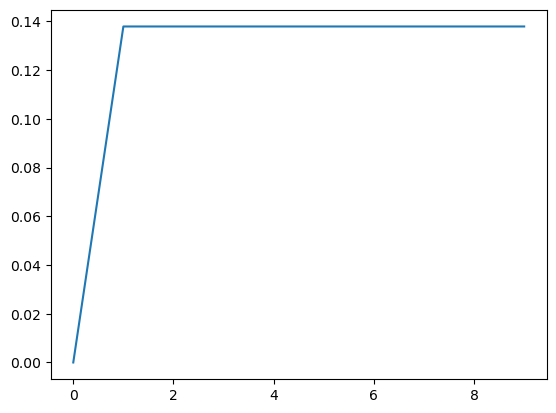

In [132]:
# vizualizando acuracia do modelo
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])